# Wyłudzenia transakcji kartowych

Na podstawie danych zawartych w zbiorze https://www.kaggle.com/mlg-ulb/creditcardfraud dotyczącym wyłudzeń transakcji kartowych, stwórz model SVM, który szacować będzie wystąpienie wyłudzenia.

##### Uwaga:
Zbiór cech jest wynikiem analizy głównych składowych (PCA). Na potrzeby zadania nie jest ważne z jakich danych powstały te cechy, uznajemy że podmiot dla kórego tworzymy model dostarcza nam dane w takie formie.

##### W zadaniu muszą pojawić się co najmniej takie punkty jak:
- Eksploracyjna analiza danych
- Feature Engineering i przygotowanie zbiorów (warto wykorzystać undersampling lub oversamplig)
- Trening modelu i ocena jego jakości
- Komentarze/wnioski na poszczególnych etapach (przy obserwacjach i podejmowaniu decyzji)

### Termin oddania: 26.05.2023 23:59

#### Eksploracyjna analiza danych

https://www.kaggle.com/code/pierra/credit-card-dataset-svm-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score, precision_score, classification_report
from sklearn import svm

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#uwagę zwraca minimalna wartość zmiennej 'Amount' = 0, co wskazuje na trasakcje bez kwoty
print('Ilość transakcji bez kwoty: ',df[df['Amount']==0].shape[0])
print('Udział transakcji bez kwoty: ',(round(df[df['Amount']==0].shape[0]/df.shape[0],2)))

Ilość transakcji bez kwoty:  1825
Udział transakcji bez kwoty:  0.01


In [8]:
#Sprawdzenie udziału kategorii targetu
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
fraud = df.Class.value_counts()/df.shape[0]
fraud = pd.DataFrame(fraud)
fraud
# niezbalansowany zestaw danych dla zmiennej celu, klasa oszustw stanowi 0,17% 

,Class
0,0.998273
1,0.001727


In [10]:
# wpływ transakcji bez kwoty na ilość wystapienia fraudu
print('Ilość oszustw z transakcją bez kwoty: ', df.loc[(df['Amount']==0) & (df['Class']==1)].shape[0])
print('Udział oszustw z transakcją bez kwoty: ',(round(df.loc[(df['Amount']==0) & (df['Class']==1)].shape[0]/df[df.Class==1].shape[0],2)))

Ilość oszustw z transakcją bez kwoty:  27
Udział oszustw z transakcją bez kwoty:  0.05


In [11]:
# odrzucenie transakcji bez kwoty
df = df.loc[df['Amount'] != 0]

In [12]:
print('Ilość transakcji bez kwoty: ',df[df['Amount']==0].shape[0])

Ilość transakcji bez kwoty:  0


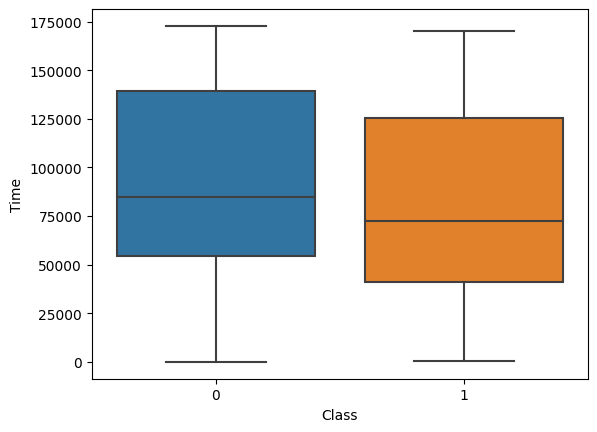

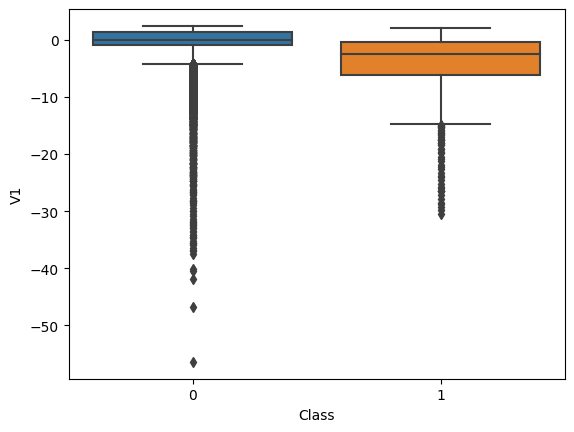

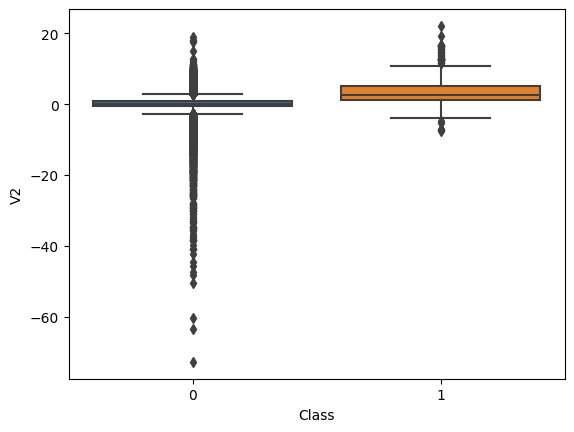

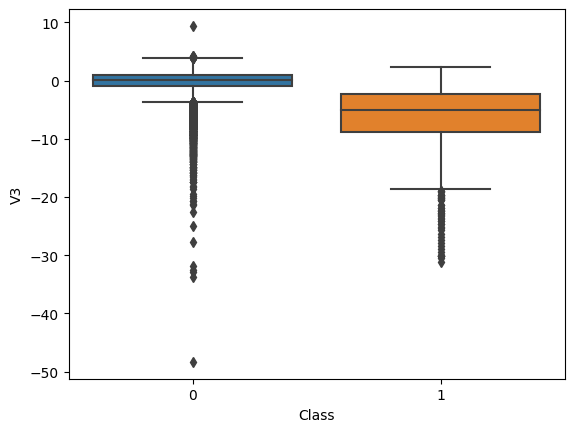

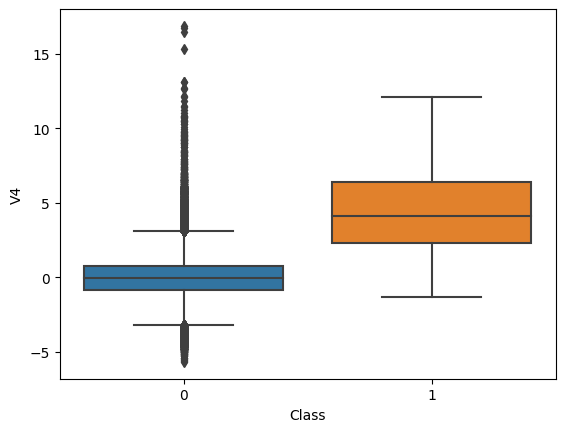

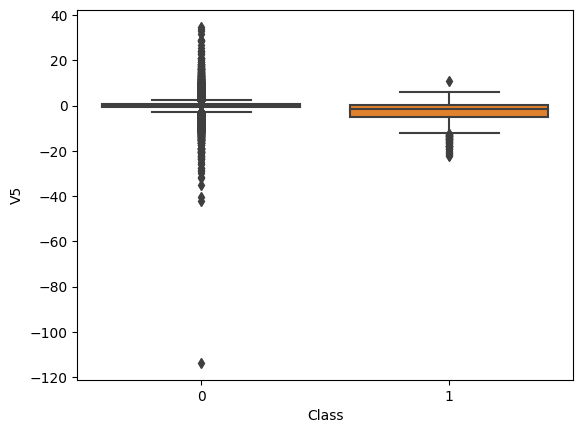

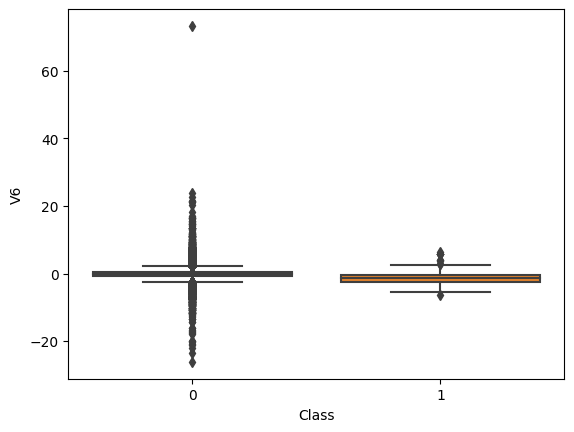

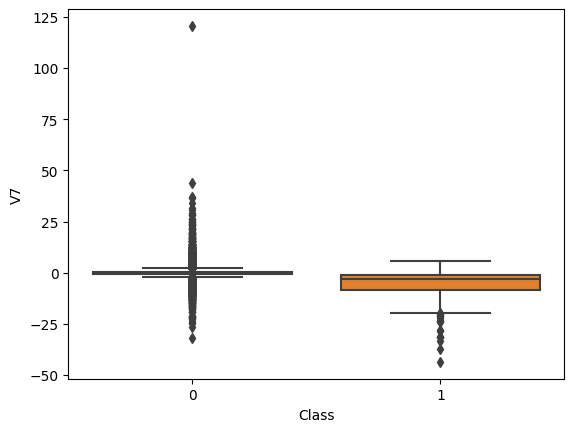

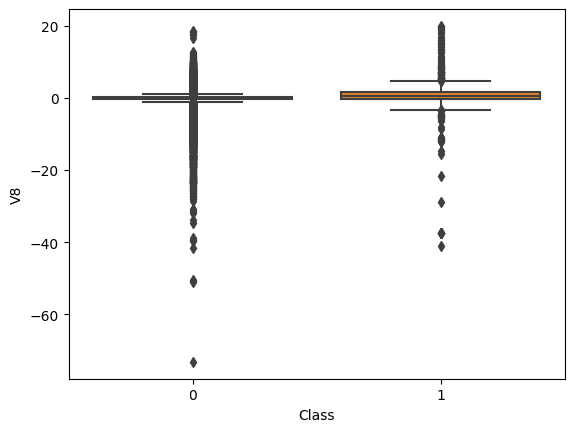

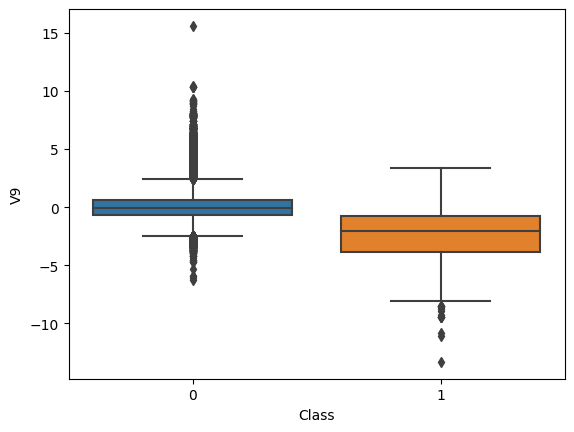

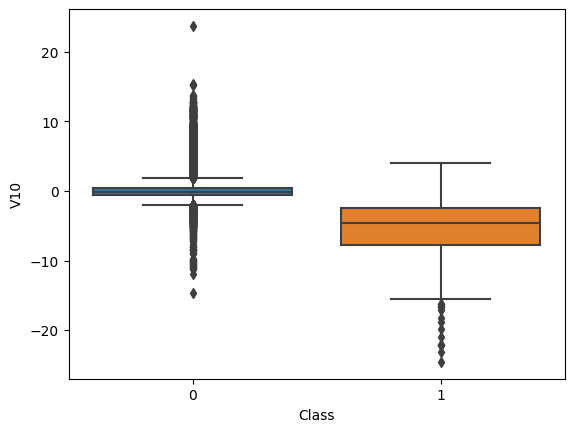

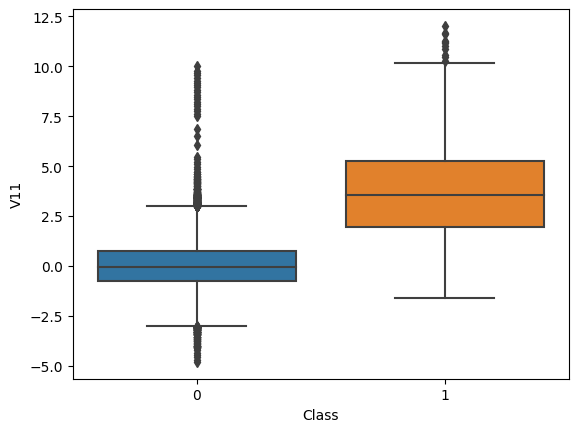

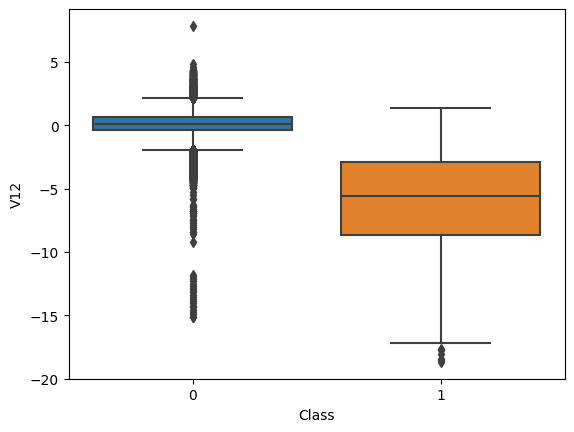

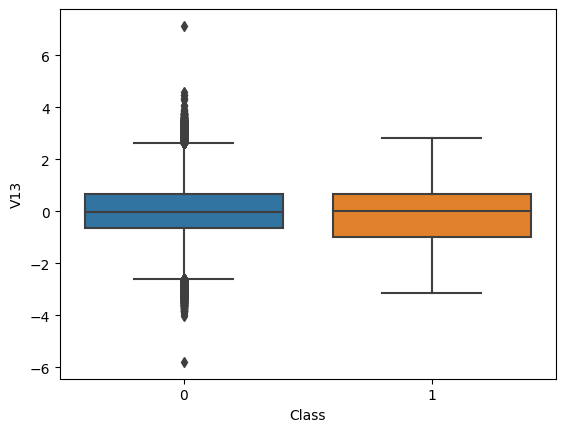

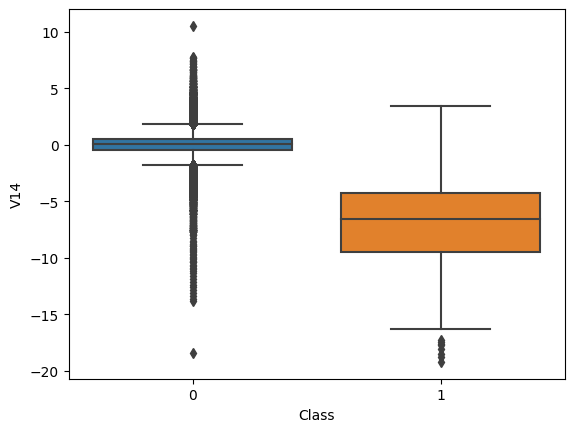

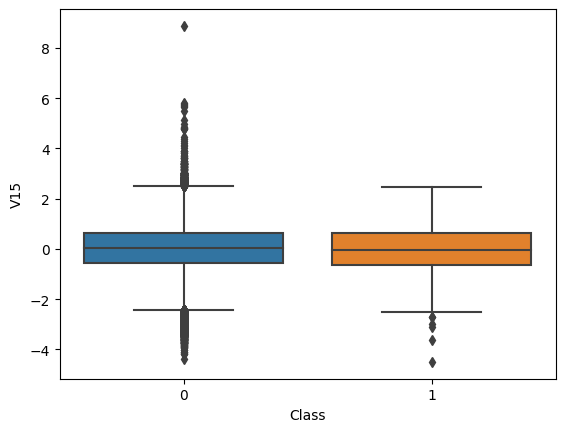

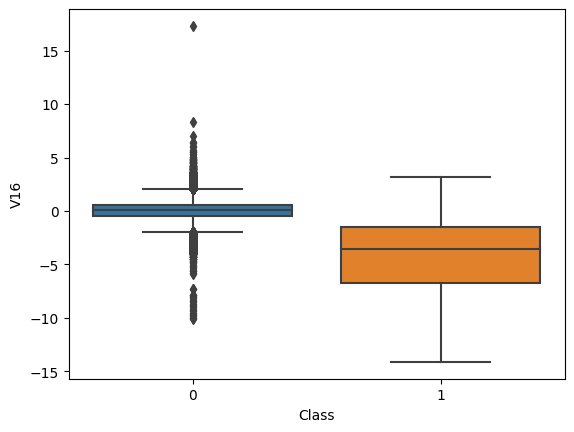

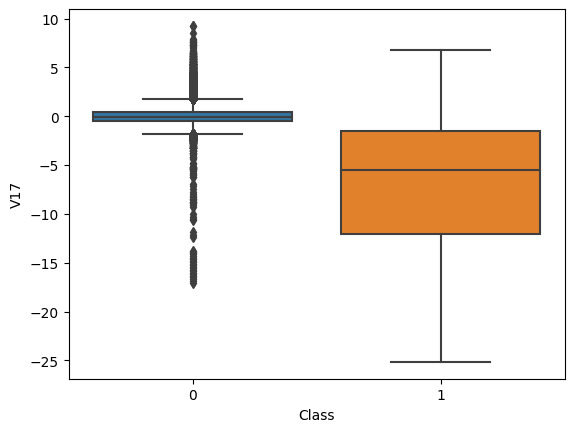

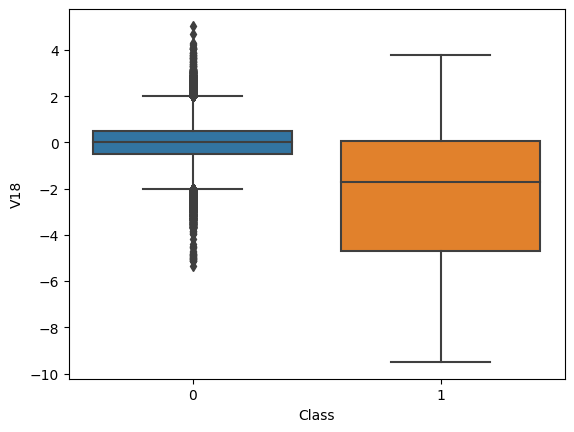

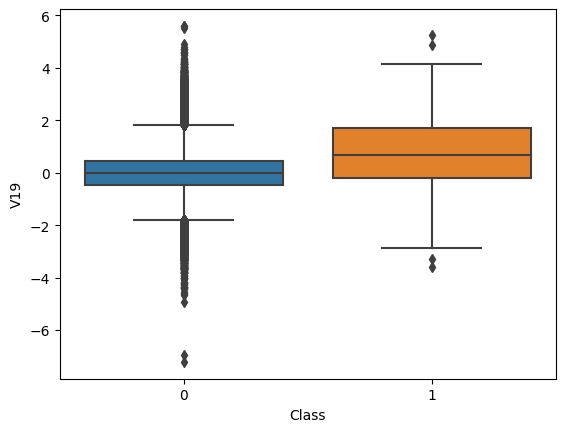

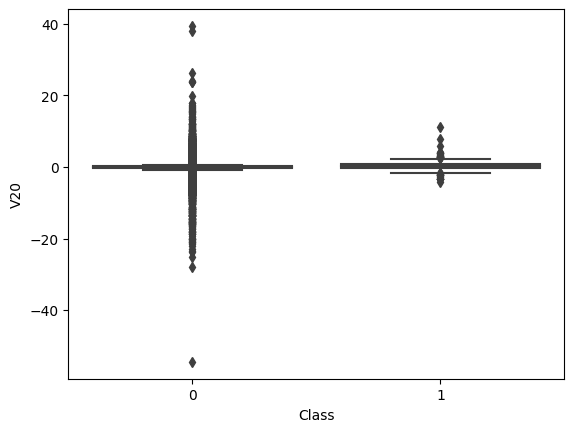

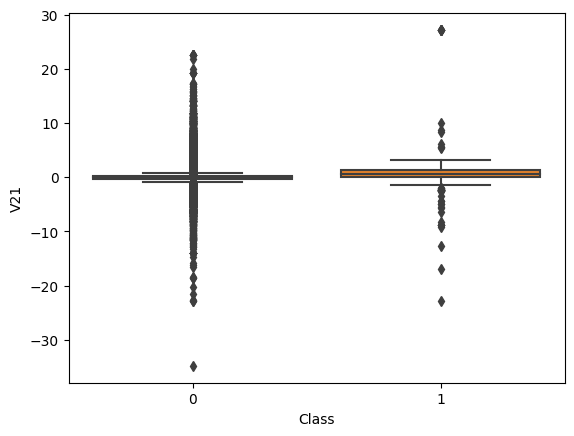

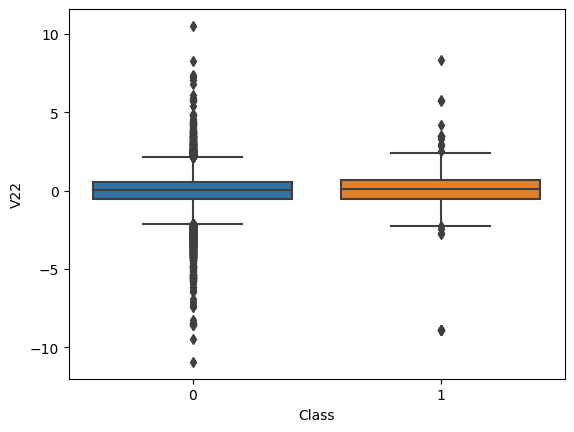

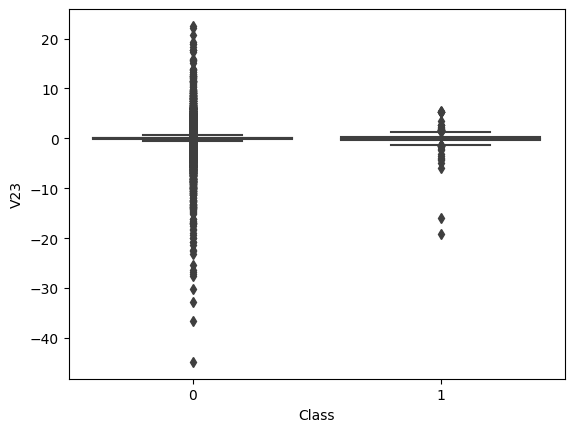

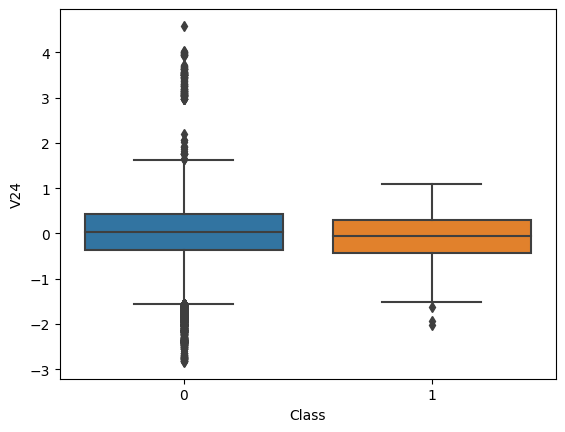

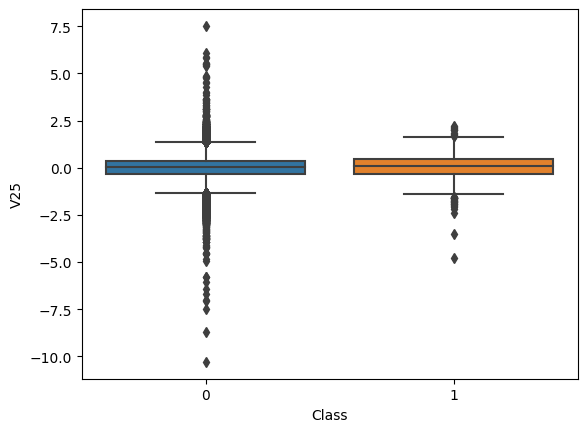

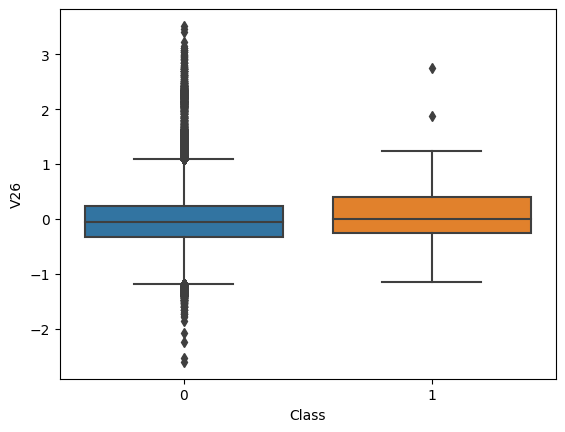

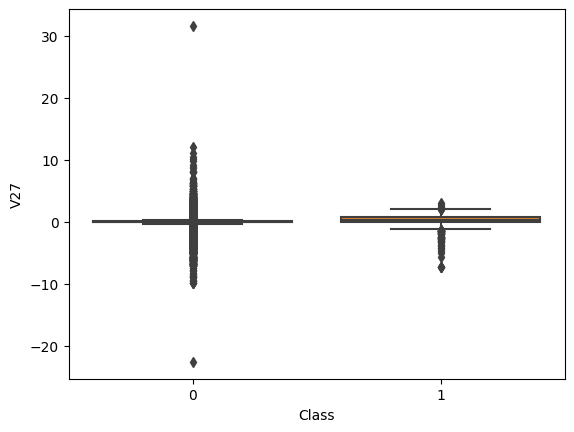

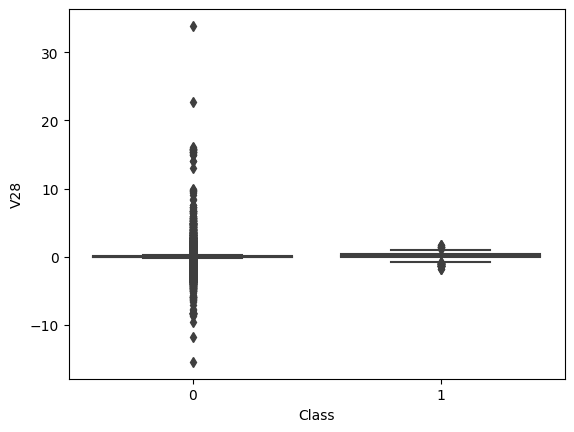

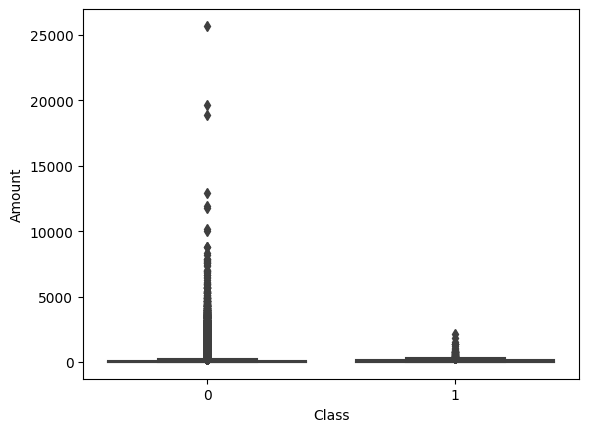

In [13]:
for col in df.columns[:-1]:
    sns.boxplot(data=df,x=df.columns[-1],y=col)
    plt.show()
# na wykresach jedynie dla kilku zminneych wejściowcyh widac niewielką zalezność w odniesieniu do zmiennej celu

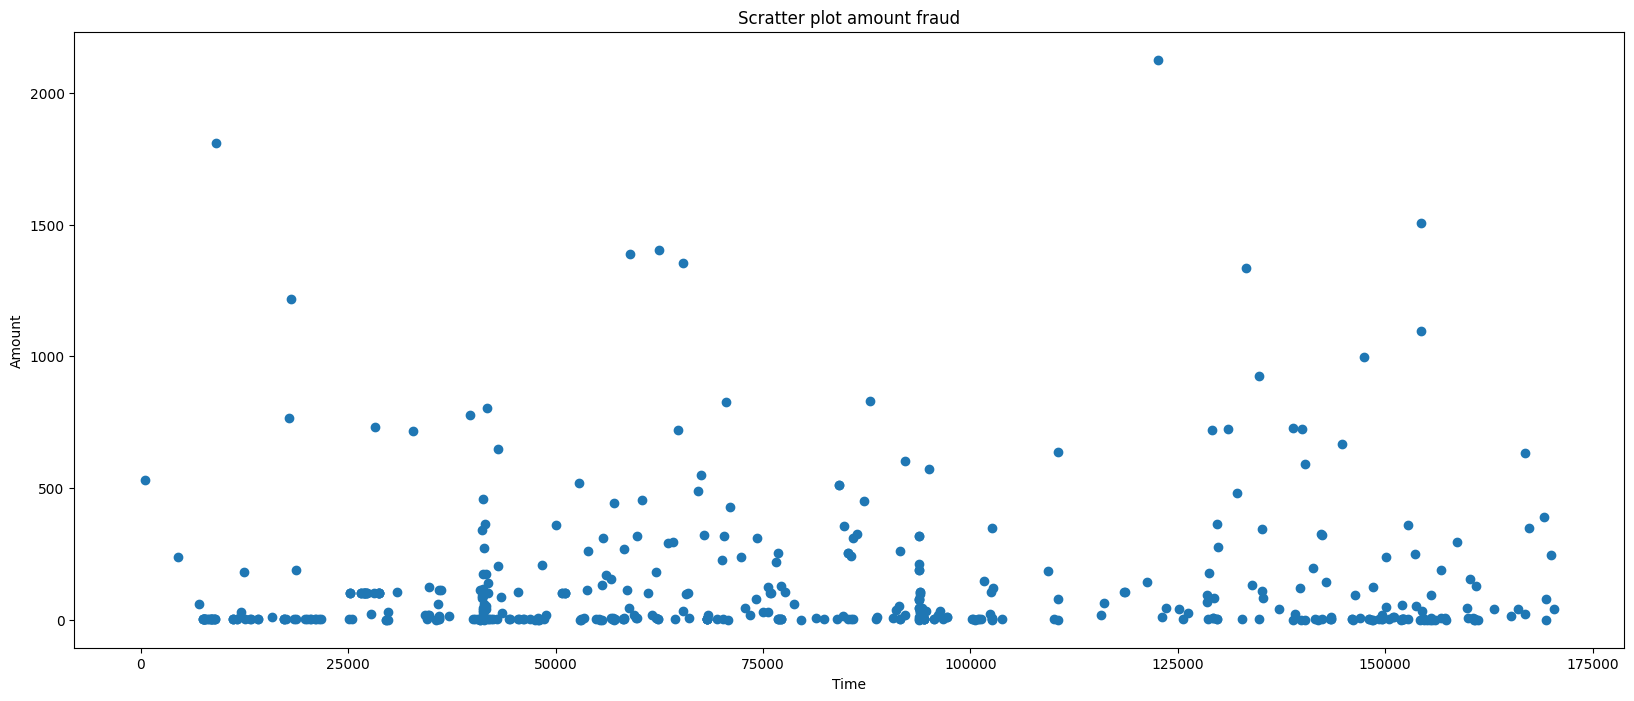

In [14]:
df_fraud = df[df['Class'] == 1] 
plt.figure(figsize=(20,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [15]:
# większość oszustw dotyczy niskich kwot, czas nie ma wpływu na ilość oszustw

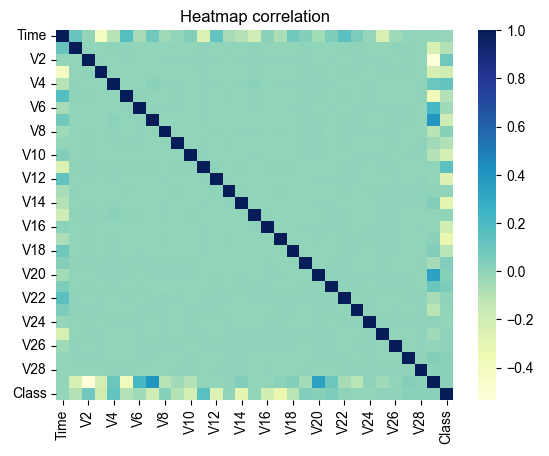

In [16]:
df_corr=df.corr()
sns.heatmap(df_corr, cmap="YlGnBu") 
sns.set(font_scale=1)
plt.title('Heatmap correlation')
plt.show()

Ranking dla korelacji zmiennych wejściowych i zmiennej celu

In [17]:
rank = df_corr.Class
df_rank = pd.DataFrame(rank) 
df_rank = df_rank.sort_values(by='Class', ascending=False) 
df_rank 
# nie można wytypować predyktorów na podstawie korelacji (brak korelacji)

,Class
Class,1.000000
V11,0.150563
V4,0.130052
V2,0.089696
V21,0.042439
V19,0.036827
V8,0.020931
V20,0.018464
V27,0.016789
V28,0.008931


#### Feature Engineering i przygotowanie zbiorów 

UNDERSAMPLING

In [18]:
# tworzymy podział danych na zbiór treningowy i testowy

df_train=df[0:150000] # Zbiór treningowy

df_train_1 = df_train[df_train['Class'] == 1] 
df_train_0 = df_train[df_train['Class'] == 0]

print(len(df_train_1)) # ilość oszustw w zbiorze treningowym
print(len(df_train_0)) # ilość transakcji prawidłowych w zbiorze treningowym

305
149695


In [19]:
df_sample_0=df_train_0.sample(305) # dobieramy do zbioru terningowego taką samą ilość transakcji prawidłowych
df_train = pd.concat([df_train_1,df_sample_0])

df_train = df_train.sample(frac=1) # miksujemy nasz zniór treningowy

print('Ilość oszustw w zbiorze treningowym: ', len(df_train[df_train['Class'] == 1]))
print('Ilość transakcji prawidłowych  w zbiorze treningowym: ', len(df_train[df_train['Class'] == 0]))

Ilość oszustw w zbiorze treningowym:  305
Ilość transakcji prawidłowych  w zbiorze treningowym:  305


In [20]:
features = df_train.columns[:-1]
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [21]:
X_train = df_train[features]
y_train = df_train['Class']

In [22]:
df_test= df[150000:] # zbiór testowy

In [23]:
X_test= df_test[features]
y_test= df_test['Class']

#print(len(df_test[df_test['Class'] == 1]))
#print(len(df_test[df_test['Class'] == 0]))

In [24]:
#standaryxacja
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Trening modelu i ocena jego jakości

In [31]:
classifier = svm.SVC(kernel='linear', verbose=True, C=1) 

In [32]:
start_time = time.time()

classifier.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f'Training time: {elapsed_time:.3f} seconds')

[LibSVM]Training time: 0.015 seconds


In [33]:
#predykcja
pred_test = classifier.predict(X_test) 

In [34]:
classifier.score(X_train,y_train) # score na treningu

0.9475409836065574

In [35]:
classifier.score(X_test,y_test) # score na tescie

0.9334045209126047

In [36]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    132822
           1       0.02      0.93      0.03       160

    accuracy                           0.93    132982
   macro avg       0.51      0.93      0.50    132982
weighted avg       1.00      0.93      0.96    132982



In [37]:
scores = {'Accuracy':round(accuracy_score(y_test,pred_test),3),
          'F1_score':round(f1_score(y_test,pred_test),3),
          'Recall':round(recall_score(y_test,pred_test),3),
          'Precision':round(precision_score(y_test,pred_test),3)}
df_rf=pd.DataFrame(data=scores,index=['SVM_classifier'])
df_rf

,Accuracy,F1_score,Recall,Precision
SVM_classifier,0.933,0.032,0.925,0.016


In [38]:
def print_confusion_matrix(confusion_matrix, class_names):
    df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    df.index.name = 'Actual'
    df.columns.name = 'Predicted'
    
    print(df)

class_names = ['Not fraud', 'Fraud']

In [39]:
cm = confusion_matrix(y_test, pred_test)
print('\nConfusion matrix:')
print_confusion_matrix(cm, class_names)


Confusion matrix:
Predicted  Not fraud  Fraud
Actual                     
Not fraud     123978   8844
Fraud             12    148


Text(0.5, 286.0444444444445, 'PREDICTED')

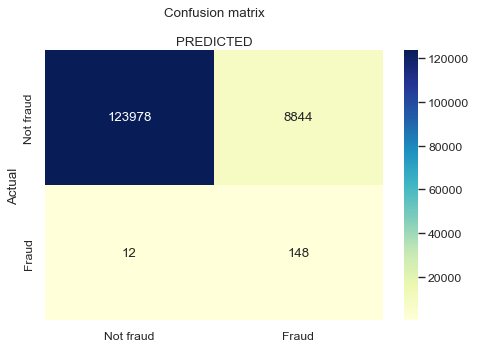

In [40]:
#wizulaizacja dla confusion_matrix
class_names = ['Not fraud', 'Fraud']# name  of classes
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred_test),index=class_names, columns=class_names), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('PREDICTED')

In [70]:
# obliczanie metryk zweryfikowanych krzyżowo 
from sklearn.model_selection import cross_val_score

In [71]:
# sprawdzamy jaka będzie jakość modelu na 5 podgrupach zbioru treningowego 
scores = cross_val_score(classifier, X_train,y_train, cv=8 )

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [73]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# nie ma zbyt dużej rozbieżności pomiedzy ogólnym accuracy a accuracy dla podzbiórów, więc model jest stabilny

0.93 accuracy with a standard deviation of 0.03


Model jest stabilny, wykazuje dość wysoką dokładnośc i czułość (czyli ilość odsetek poprawnych klasyfikacji(TP+TN) i zdolnośc do wychwytywania oszustw TP/(TP+FN)).
Model:
- na 160 oszustw wykryl 148, pominął tylko 12 osób! (wysoki reecal)
- na 132822 prawidłowe transakcje fałszywie oskarżył 8844 klientów (niski precision)

Model generuje zbyt dużą ilość FP, co będzie niepokoić uczciwych kilentów, dlatego należy optymalizowac model pod kątem prcision.